# Notebook visualisation 

importer les libraries 

In [20]:

import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


Charger un fichier JSON

In [21]:
with open(rf"C:\Users\noara\Git\waterlevelprediction\data\Adour_Adour__2016-05-27__2025-03-14.json") as f:
    fulljson = json.load(f)

retourne un dictionnaire de size 4 data géometry proprieties et type 

on passe la key data (liste de dictionnaire)  en dataframe avec laquelle on pourra travailler 


In [22]:
df=pd.DataFrame(fulljson["data"]) 

In [23]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 7 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   identifier                                                 273 non-null    object 
 1   time                                                       273 non-null    float64
 2   datetime                                                   273 non-null    object 
 3   orthometric_height_of_water_surface_at_reference_position  273 non-null    float64
 4   associated_uncertainty                                     273 non-null    float64
 5   satellite                                                  273 non-null    object 
 6   ground-track_number                                        273 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 15.1+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 7 columns):
 #   Column                                                     Non-Null Count  Dtype         
---  ------                                                     --------------  -----         
 0   identifier                                                 273 non-null    int32         
 1   time                                                       273 non-null    float64       
 2   datetime                                                   273 non-null    datetime64[ns]
 3   orthometric_height_of_water_surface_at_reference_position  273 non-null    float64       
 4   associated_uncertainty                                     273 non-null    float64       
 5   satellite                                                  273 non-null    int32         
 6   ground-track_number                                        273 non-null    int64         
dtypes: datetime64[ns](1), float64(3), in

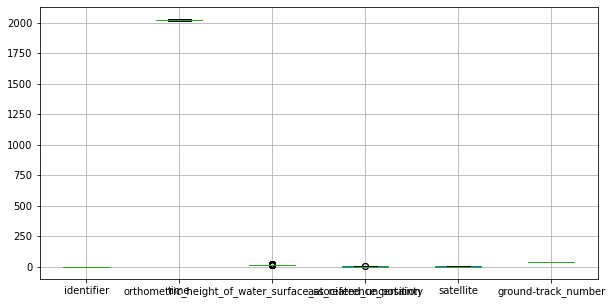

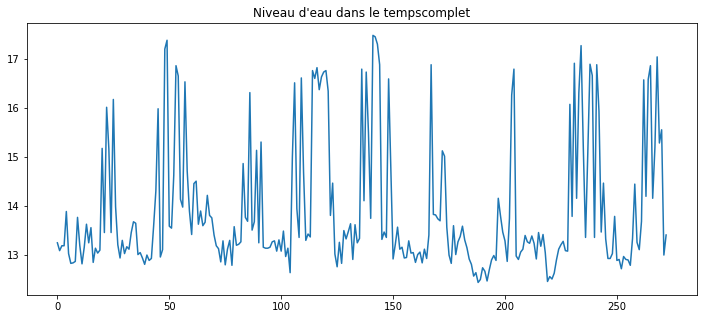

<AxesSubplot:xlabel='orthometric_height_of_water_surface_at_reference_position', ylabel='Count'>

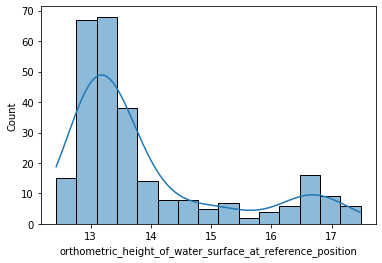

In [24]:
df["datetime"] = pd.to_datetime(df["datetime"], format="%Y/%m/%d %H:%M")
categorical_colums = df.select_dtypes(include = ['object']).columns.tolist()

def label_encode_columns(data, columns):
    for col in columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])        
    return data
df = label_encode_columns(df, categorical_colums)

print('apres traitement', df.info()) 
plt.figure(figsize=(10, 5))
df.boxplot()

plt.figure(figsize=(10, 5))  # Définir la taille du graphique
df['orthometric_height_of_water_surface_at_reference_position'].plot(figsize=(12, 5), title="Niveau d'eau dans le tempscomplet")
plt.show()

sns.histplot(df['orthometric_height_of_water_surface_at_reference_position'], kde=True)


<AxesSubplot:title={'center':'Top 10 pics de niveau'}, xlabel='datetime'>

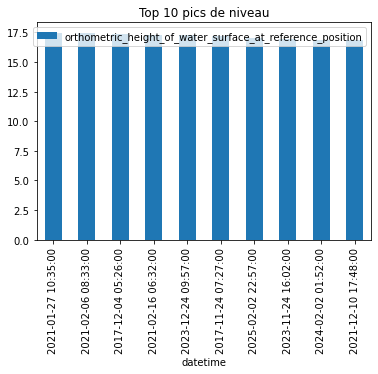

In [25]:
top10 = df.sort_values(by='orthometric_height_of_water_surface_at_reference_position', ascending=False).head(10)
top10.plot(x='datetime', y='orthometric_height_of_water_surface_at_reference_position', kind='bar', title='Top 10 pics de niveau')

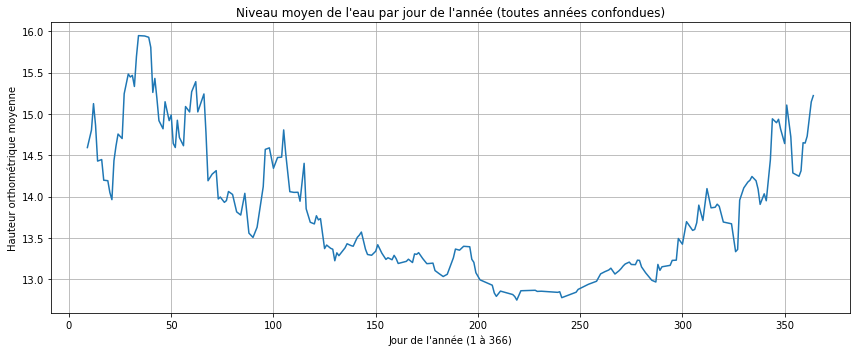

In [26]:
df = df.set_index('datetime')

# On crée une colonne "jour de l'année" (1 à 366)
df['day_of_year'] = df.index.dayofyear

# On calcule la moyenne pour chaque jour de l'année sur toutes les années
daily_avg = df.groupby('day_of_year')['orthometric_height_of_water_surface_at_reference_position'].mean()

# Visualisation
plt.figure(figsize=(12, 5))
plt.plot(daily_avg.rolling(7).mean())  # moyenne glissante sur 7 jours
plt.title("Niveau moyen de l'eau par jour de l'année (toutes années confondues)")
plt.xlabel("Jour de l'année (1 à 366)")
plt.ylabel("Hauteur orthométrique moyenne")
plt.grid(True)
plt.tight_layout()
plt.show()